## Include all necessary Libraries

In [1]:
# Base Libraries
import os                                                                 # OS Library
import pandas as pd                                                       # Pandas Library
import numpy as np                                                        # Numpy Library
from fastai.tabular.all import df_shrink                                  # Library to shrink 
from fastcore.parallel import *                                           # Library for parallel tasks
import time                                                               # Time function library
import matplotlib.pyplot as plt                                           # plot library
import seaborn as sns                                                     # plot library

# import memory_profiler, memory_                                         # memory usage library
# from memory_profiler import memory_usage
from collections import Counter                                           # Counter library
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline
import psutil

# Libraries for feature engineering
from sklearn.model_selection import train_test_split                      # Dataset split library
# from sklearn.model_selection import GridSearchCV                          # Gridsearch library for hyper parameter tuning
from sklearn.preprocessing import LabelEncoder                            # LabelEnoder
# from sklearn.preprocessing import OneHotEncoder                           # Onehotencoding 
from sklearn.feature_selection import VarianceThreshold                   # For removing zero variance features
from sklearn.preprocessing import MinMaxScaler, StandardScaler            # Apply Standarization and Normalization 
from imblearn.over_sampling import SMOTE, SMOTEN, SMOTENC                 # Over-sampling Library
from imblearn.under_sampling import RandomUnderSampler, TomekLinks        # Under-Sampling
from tqdm import tqdm

# Performance measure Libraries for Trained model 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

# Deep learning Model Libraries
# import tensorflow as tf
import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import DataLoader, TensorDataset
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout  
import torch.multiprocessing
torch.multiprocessing.set_sharing_strategy('file_system')


In [2]:
!python --version


Python 3.10.16


## Create a csv read function 

In [3]:
def csvRead (sfilePath):
    print("CSV Read function started........")
#     ind_dfs = [pd.read_csv(dsp) for dsp in filePathArray]
    ind_dfs = pd.read_csv(sfilePath)
    return ind_dfs

## Create a datatype downsizing function

In [4]:
def dataTypeDown(ind_dfs_read):
    print("Datatype Downsizing function started........")
#     ind_dfs_down = parallel(df_shrink, ind_dfs_read, progress=True)
    ind_dfs_down = df_shrink(ind_dfs_read)
    return ind_dfs_down

## List the files in our target directory we are interested to read

In [5]:
filePath = []
individual_dfs = []
# for root, subdir, files in os.walk('D:/Datasets/CICDDoS2019/testing_03_11/'):
for root, subdir, files in os.walk('/home/deeplearning/Datasets/CICDDoS2019/testing_03_11'):
# print(root)
    for file in files:
        if file.endswith('.csv'):
            fpath = os.path.join(root,file)
            filePath.append(fpath)
            print (fpath)
            print("-----------------------------------------------------------------------")
#             print (f'Total no of files meet our criteria are: ', len(filePath))
            if (len(filePath)):
                ind_dfs_read = csvRead(fpath)
#                 time.sleep(15)
                print("starting downsizing.....")
#                 individual_dfs = [dataTypeDown(ind_dfs_read)]
                individual_dfs.append(dataTypeDown(ind_dfs_read))
                print(f'No. of Instances in the file are:',ind_dfs_read.shape)
#                 time.sleep(5)
print('**************************')
print (f'Total no of files meet our criteria are: ', len(filePath))
print("Dataset Read Task Completed!!!!")

/home/deeplearning/Datasets/CICDDoS2019/testing_03_11/LDAP-MSSQL.csv
-----------------------------------------------------------------------
CSV Read function started........
starting downsizing.....
Datatype Downsizing function started........
No. of Instances in the file are: (256201, 78)
/home/deeplearning/Datasets/CICDDoS2019/testing_03_11/Syn.csv
-----------------------------------------------------------------------
CSV Read function started........
starting downsizing.....
Datatype Downsizing function started........
No. of Instances in the file are: (479899, 78)
/home/deeplearning/Datasets/CICDDoS2019/testing_03_11/NetBIOS.csv
-----------------------------------------------------------------------
CSV Read function started........
starting downsizing.....
Datatype Downsizing function started........
No. of Instances in the file are: (11028, 78)
/home/deeplearning/Datasets/CICDDoS2019/testing_03_11/UDP-UDPLag-Syn.csv
--------------------------------------------------------------

## Replace space with "_" in dataset column names

In [6]:
for i in individual_dfs:
    # Remove leading and trailing spaces from column names
#     cleaned_columns = [col.strip() for col in cols]
#     print(cleaned_columns)
    cols = i.columns.str.strip()
#     cols = [col.strip() for col in cols]
    cols = cols.map(lambda x: x.replace(' ', '_') )
    i.columns = cols
#     print(i.columns)
print('Task Completed')

Task Completed


## Dataset summary

In [7]:
# individual_dfs[0].info(verbose=True)
individual_dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256201 entries, 0 to 256200
Data columns (total 78 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Protocol                     256201 non-null  int8    
 1   Flow_Duration                256201 non-null  int32   
 2   Total_Fwd_Packets            256201 non-null  int16   
 3   Total_Backward_Packets       256201 non-null  int16   
 4   Total_Length_of_Fwd_Packets  256201 non-null  float32 
 5   Total_Length_of_Bwd_Packets  256201 non-null  float32 
 6   Fwd_Packet_Length_Max        256201 non-null  float32 
 7   Fwd_Packet_Length_Min        256201 non-null  float32 
 8   Fwd_Packet_Length_Mean       256201 non-null  float32 
 9   Fwd_Packet_Length_Std        256201 non-null  float32 
 10  Bwd_Packet_Length_Max        256201 non-null  float32 
 11  Bwd_Packet_Length_Min        256201 non-null  float32 
 12  Bwd_Packet_Length_Mean       256201 non-null

## Dataset split into X (input) and y (Target)

In [8]:
individual_X = []
individual_y = []
count = 0
for i in individual_dfs:
#     Target (Output) values
    temp_y = i.copy()
    individual_y.append(i['Label'])
    print(individual_y[count].shape)
#     Input values
    temp_X = i.copy()
    temp_X = temp_X.drop('Label', axis=1)
    individual_X.append(temp_X)
    print(individual_X[count].shape)
    count+=1
    print('------------------------------')

(256201,)
(256201, 77)
------------------------------
(479899,)
(479899, 77)
------------------------------
(11028,)
(11028, 77)
------------------------------
(139566,)
(139566, 77)
------------------------------
(22445,)
(22445, 77)
------------------------------
(5998,)
(5998, 77)
------------------------------
(1295988,)
(1295988, 77)
------------------------------


## Verify the split task

In [9]:
individual_X[0].columns

Index(['Protocol', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes/s', 'Flow_Packets/s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets/s', 'Bwd_Packets/s',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN_Flag_Count', 'R

In [10]:
# To get detail overview of the dataset run this command
# individual_X[0].info(verbose=True)
individual_X[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256201 entries, 0 to 256200
Data columns (total 77 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Protocol                     256201 non-null  int8   
 1   Flow_Duration                256201 non-null  int32  
 2   Total_Fwd_Packets            256201 non-null  int16  
 3   Total_Backward_Packets       256201 non-null  int16  
 4   Total_Length_of_Fwd_Packets  256201 non-null  float32
 5   Total_Length_of_Bwd_Packets  256201 non-null  float32
 6   Fwd_Packet_Length_Max        256201 non-null  float32
 7   Fwd_Packet_Length_Min        256201 non-null  float32
 8   Fwd_Packet_Length_Mean       256201 non-null  float32
 9   Fwd_Packet_Length_Std        256201 non-null  float32
 10  Bwd_Packet_Length_Max        256201 non-null  float32
 11  Bwd_Packet_Length_Min        256201 non-null  float32
 12  Bwd_Packet_Length_Mean       256201 non-null  float32
 13 

## Further Processing on dataset by concatinating All files.

## Concatinating dataset file into a single file

In [11]:
all_X =  pd.concat(individual_X, ignore_index=True)
all_y = pd.concat(individual_y, ignore_index=True)
all_X.shape, all_y.shape

((2211125, 77), (2211125,))

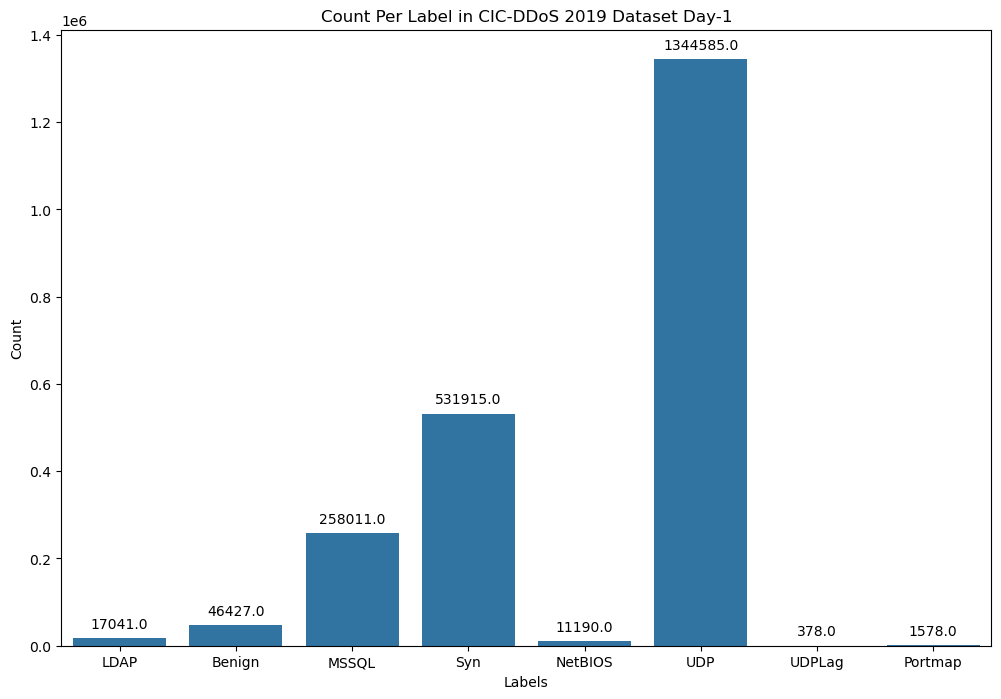

In [12]:
plt.figure(figsize=(12, 8))
# Create a count plot of the string labels
ax = sns.countplot(x=all_y)
# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count Per Label in CIC-DDoS 2019 Dataset Day-1')
plt.show()


In [13]:
unique_value_count = all_y.value_counts()
unique_value_count

Label
UDP        1344585
Syn         531915
MSSQL       258011
Benign       46427
LDAP         17041
NetBIOS      11190
Portmap       1578
UDPLag         378
Name: count, dtype: int64

In [14]:
# summarize distribution
counter = Counter(all_y)
for k,v in counter.items():
    per = v / len(all_y) * 100
    print('Class = %-15s,     n = %-10d,        (%-8.3f%%)' % (k, v, per))

Class = LDAP           ,     n = 17041     ,        (0.771   %)
Class = Benign         ,     n = 46427     ,        (2.100   %)
Class = MSSQL          ,     n = 258011    ,        (11.669  %)
Class = Syn            ,     n = 531915    ,        (24.056  %)
Class = NetBIOS        ,     n = 11190     ,        (0.506   %)
Class = UDP            ,     n = 1344585   ,        (60.810  %)
Class = UDPLag         ,     n = 378       ,        (0.017   %)
Class = Portmap        ,     n = 1578      ,        (0.071   %)


## Dataset verification

In [15]:
all_X.iloc[20:30].head(10)

,Protocol,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
20,17,53,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,17,1,2,0,1472.0,0.0,736.0,736.0,736.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,17,48,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,17,49,2,0,2656.0,0.0,1328.0,1328.0,1328.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,17,4,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,17,6,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,17,1,2,0,2912.0,0.0,1456.0,1456.0,1456.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,17,49,2,0,2928.0,0.0,1464.0,1464.0,1464.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,17,2,2,0,2848.0,0.0,1424.0,1424.0,1424.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,17,50,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Label encoding performed on all_y dataset 

In [16]:
# Apply label encoding to the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(all_y)

# Get the mapping of original labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Print the mapping
print("Label Mapping:")
for label, encoded_value in label_mapping.items():
    print(f"{label}: {encoded_value}")

print (f"Shape of the target values {y_encoded.shape}")

Label Mapping:
Benign: 0
LDAP: 1
MSSQL: 2
NetBIOS: 3
Portmap: 4
Syn: 5
UDP: 6
UDPLag: 7
Shape of the target values (2211125,)


## Train - Test Split on all 77 features

In [17]:
test_size = 0.3 # number of training raws (70%-30%)
random_state = 42 # random seed

X_train_v0, X_test_v0, y_train_v0, y_test_v0 = train_test_split(all_X, y_encoded, 
                                                                test_size=test_size, 
                                                                shuffle=True,
                                                                stratify=y_encoded, 
                                                                random_state=random_state)
X_train_v0.shape, y_train_v0.shape, X_test_v0.shape, y_test_v0.shape

((1547787, 77), (1547787,), (663338, 77), (663338,))

## Dataset Creation with StandardScaler-Random Undersampler-SMOTE with 77 Features

## Calculate the minimum, mean, and median number of instances per class

In [18]:
# Calculate the minimum, mean, and median number of instances per class
class_distribution = pd.Series(y_train_v0).value_counts()
min_instances = class_distribution.min()
mean_instances = int(class_distribution.mean())
median_instances = int(class_distribution.median())
min_instances, mean_instances, median_instances
# sampling_strategy = {cls: mean_instances for cls in class_distribution.index}
# print(sampling_strategy)


(265, 193473, 22214)

In [19]:
def create_datasets(X, y, threshold, scaler):
    print(f'The shape of X and y is ',X.shape, y.shape)
    # Determine the class labels
    class_label = pd.Series(y).unique()

    print('------------------------------------------------')
    print(f'The class encoded labels are ',class_label)
    print (f'The threshold is ', threshold)
    print (f'The scaler is ', scaler)
    print('------------------------------------------------')
    print(f'dataset creation process started for : {threshold} instances for each Class' )
    
    # Determine the classes that need under-sampling and SMOTE
    under_sample_classes = [class_label for class_label, count in class_distribution.items() if count > threshold]
    smote_classes = [class_label for class_label, count in class_distribution.items() if count <= threshold]

    print(f'under sampling classes are: ', under_sample_classes)
    print(f'SMOT Over sampling classes are: ', smote_classes)
    
    # Create a sampling strategy dictionary
    rus_sampling_strategy = {}
    smt_sampling_strategy = {}
    
    for class_label in under_sample_classes:
        rus_sampling_strategy[class_label] = threshold
    
    for class_label in smote_classes:
        smt_sampling_strategy [class_label]= threshold
    
#     transformer = ColumnTransformer([
#         ('scale', StandardScaler(), X.columns)
#     ])
    
    # Define the pipeline
    pipeline = Pipeline([
#         ('transformer', transformer),
        # ('scale', StandardScaler()),
        ('scale', scaler), # Now getting the scaler to work, from function call
        ('rus', RandomUnderSampler(sampling_strategy=rus_sampling_strategy)),
        ('smote', SMOTE(sampling_strategy=smt_sampling_strategy))
    ], verbose=True)

    # Apply the pipeline to create a new dataset
    X_resampled, y_resampled = pipeline.fit_resample(X, y)
#     pipeline.fit(X,y)
    print(f'dataset creation process completed for : {threshold} instances for each Class' )
    return X_resampled, y_resampled, pipeline 

## Dataset Creation with Standard-Scaler Random Undersampler and SMOTE 

In [20]:
# Create three datasets based on the thresholds
X_min_SS_77, y_min_SS_77, pipeline_min_SS_77 = create_datasets(X_train_v0, y_train_v0, min_instances, StandardScaler()) 
# X_mean_SS_77, y_mean_SS_77, pipeline_mean_SS_77 = create_datasets(X_train_v0, y_train_v0, mean_instances, StandardScaler()) 
# X_median_SS_77, y_median_SS_77, pipeline_median_SS_77 = create_datasets(X_train_v0, y_train_v0, median_instances, StandardScaler()) 

The shape of X and y is  (1547787, 77) (1547787,)
------------------------------------------------
The class encoded labels are  [5 6 2 1 4 0 3 7]
The threshold is  265
The scaler is  StandardScaler()
------------------------------------------------
dataset creation process started for : 265 instances for each Class
under sampling classes are:  [6, 5, 2, 0, 1, 3, 4]
SMOT Over sampling classes are:  [7]
[Pipeline] ............. (step 1 of 3) Processing scale, total=   2.1s
[Pipeline] ............... (step 2 of 3) Processing rus, total=   0.2s
[Pipeline] ............. (step 3 of 3) Processing smote, total=   0.0s
dataset creation process completed for : 265 instances for each Class


In [21]:
# X_min_SS_77.shape, y_min_SS_77.shape, X_mean_SS_77.shape, y_mean_SS_77.shape, X_median_SS_77.shape, y_median_SS_77.shape
# X_median_SS_77.shape, y_median_SS_77.shape
X_min_SS_77.shape, y_min_SS_77.shape

((2120, 77), (2120,))

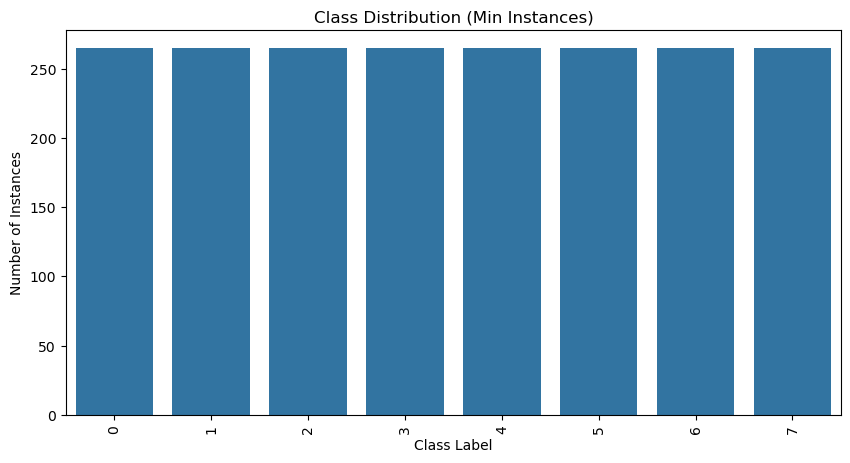

In [22]:

# Function to visualize class distribution
def plot_class_distribution(y, title):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=pd.Series(y).value_counts().index, y=pd.Series(y).value_counts().values)
    plt.title(title)
    plt.xlabel("Class Label")
    plt.ylabel("Number of Instances")
    plt.xticks(rotation=90)
    plt.show()

# Plot for each dataset
plot_class_distribution(y_min_SS_77, "Class Distribution (Min Instances)")
# plot_class_distribution(y_mean_SS_77, "Class Distribution (mean Instances)")
# plot_class_distribution(y_median_SS_77, "Class Distribution (Median Instances)")


## X_test dataset scaling with pipeline scaler

In [23]:
X_test_min_SS_77 = pipeline_min_SS_77.named_steps['scale'].transform(X_test_v0)
# X_test_mean_SS_77 = pipeline_mean_SS_77.named_steps['scale'].transform(X_test_v0)
# X_test_median_SS_77 = pipeline_median_SS_77.named_steps['scale'].transform(X_test_v0)

# X_test_min_SS_77.shape, X_test_mean_SS_77.shape, X_test_median_SS_77.shape
X_test_min_SS_77.shape
# X_test_median_SS_77.shape

(663338, 77)

### Create Validation Set from min-training set of 20%

In [24]:

# Create a validation set (20 of training data)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_min_SS_77, y_min_SS_77, test_size=0.2, random_state=42, stratify=y_min_SS_77)

# Check dataset shapes
print(f"Training Data Shape: {X_train_final.shape}, {y_train_final.shape}")
print(f"Validation Data Shape: {X_val.shape}, {y_val.shape}")
print(f"Test Data Shape: {X_test_min_SS_77.shape}, {y_test_v0.shape}")


Training Data Shape: (1696, 77), (1696,)
Validation Data Shape: (424, 77), (424,)
Test Data Shape: (663338, 77), (663338,)


In [25]:
# Convert training data to tensors
X_train_tensor = torch.tensor(X_train_final, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_final, dtype=torch.long)  # Classification task

# Convert validation data to tensors
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)  # StandardScaler applied
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# Convert test data to tensors
X_test_tensor = torch.tensor(X_test_min_SS_77, dtype=torch.float32)  # StandardScaler applied
y_test_tensor = torch.tensor(y_test_v0, dtype=torch.long)

# Print shapes to verify
print("Training Data Shape:", X_train_tensor.shape, y_train_tensor.shape)
print("Validation Data Shape:", X_val_tensor.shape, y_val_tensor.shape)
print("Test Data Shape:", X_test_tensor.shape, y_test_tensor.shape)

Training Data Shape: torch.Size([1696, 77]) torch.Size([1696])
Validation Data Shape: torch.Size([424, 77]) torch.Size([424])
Test Data Shape: torch.Size([663338, 77]) torch.Size([663338])


In [26]:
# Create PyTorch Dataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

### Create a DataLoader
#### DataLoader helps with batching, shuffling, and parallel processing for efficient training.

In [27]:
# Define batch size
batch_size = 64  # You can change this based on your system's memory
# Automatically determine an optimal number of workers
# num_workers = torch.get_num_threads()  # Adjust based on your CPU
num_workers = 4  # Adjust based on your CPU

print("Number of workers:", num_workers)
# Create DataLoader for training and validation data
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size,shuffle=False, num_workers=num_workers, pin_memory=True) 


Number of workers: 4


### Verify DataLoader
#### To check if the DataLoader works correctly, let's load a single batch and inspect the shapes.

In [28]:
# Fetch a batch of data
X_batch, y_batch = next(iter(train_loader))
print("Batch X Shape:", X_batch.shape)
print("Batch y Shape:", y_batch.shape)

Xtest_batch, ytest_batch = next(iter(test_loader))
print("Batch xtest Shape:", Xtest_batch.shape)
print("Batch ytest Shape:", ytest_batch.shape)


Batch X Shape: torch.Size([64, 77])
Batch y Shape: torch.Size([64])
Batch xtest Shape: torch.Size([64, 77])
Batch ytest Shape: torch.Size([64])


In [29]:
print(f'X_train_tensor shape is: {X_train_tensor.shape[1]}')
f, lab = train_dataset[0]
print(f'X_train_tensor shape is: {f.shape}')

X_train_tensor shape is: 77
X_train_tensor shape is: torch.Size([77])


## Training and making prediction on resampled dataset

In [30]:
# encoder and decoder training and freezing encoder for further process
class Autoencoder(nn.Module):
    def __init__(self, input_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)  # Latent space
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Initialize and train autoencoder
input_size = X_train_tensor.shape[1]
autoencoder = Autoencoder(input_size)

criterion = nn.MSELoss()  # Reconstruction loss
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

epochs = 20
for epoch in range(epochs):
    autoencoder.train()
    total_loss = 0
    
    for X_batch, _ in train_loader:
        optimizer.zero_grad()
        X_batch = X_batch.to(torch.float32)
        encoded, decoded = autoencoder(X_batch)
        loss = criterion(decoded, X_batch)  # Reconstruction loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, AE Loss: {total_loss / len(train_loader):.4f}")

# Freeze the autoencoder after training
for param in autoencoder.parameters():
    param.requires_grad = False


Epoch 1, AE Loss: 3.5267
Epoch 2, AE Loss: 3.1736
Epoch 3, AE Loss: 3.0347
Epoch 4, AE Loss: 3.1842
Epoch 5, AE Loss: 2.9724
Epoch 6, AE Loss: 2.9790
Epoch 7, AE Loss: 2.9630
Epoch 8, AE Loss: 2.9934
Epoch 9, AE Loss: 2.9601
Epoch 10, AE Loss: 2.9851
Epoch 11, AE Loss: 2.9486
Epoch 12, AE Loss: 2.9484
Epoch 13, AE Loss: 2.9660
Epoch 14, AE Loss: 3.2049
Epoch 15, AE Loss: 2.9955
Epoch 16, AE Loss: 2.9461
Epoch 17, AE Loss: 2.9461
Epoch 18, AE Loss: 2.9431
Epoch 19, AE Loss: 2.9564
Epoch 20, AE Loss: 2.9356


In [31]:
def extract_latent_features(autoencoder, dataloader):
    autoencoder.eval()
    latent_features = []
    labels = []

    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch = X_batch.to(torch.float32)
            encoded = autoencoder.encoder(X_batch)
            latent_features.append(encoded)
            labels.append(y_batch)

    features_tensor = torch.cat(latent_features, dim=0)
    labels_tensor = torch.cat(labels, dim=0)

    return features_tensor, labels_tensor


In [32]:

# 📌 Extract latent features from encoder
latent_train_tensor, train_labels_tensor = extract_latent_features(autoencoder, train_loader)
latent_val_tensor, val_labels_tensor     = extract_latent_features(autoencoder, val_loader)
latent_test_tensor, test_labels_tensor   = extract_latent_features(autoencoder, test_loader)

# ✅ Print shapes to verify
print("Latent Train Shape:", latent_train_tensor.shape)
print("Train Labels Shape:", train_labels_tensor.shape)
print("Latent Val Shape:", latent_val_tensor.shape)
print("Val Labels Shape:", val_labels_tensor.shape)
print("Latent Test Shape:", latent_test_tensor.shape)
print("Test Labels Shape:", test_labels_tensor.shape)


Latent Train Shape: torch.Size([1696, 32])
Train Labels Shape: torch.Size([1696])
Latent Val Shape: torch.Size([424, 32])
Val Labels Shape: torch.Size([424])
Latent Test Shape: torch.Size([663338, 32])
Test Labels Shape: torch.Size([663338])


In [37]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset_latent = TensorDataset(latent_train_tensor, y_train_tensor)
test_dataset_latent = TensorDataset(latent_test_tensor, y_test_tensor)

train_loader_latent = DataLoader(train_dataset_latent, batch_size=64, shuffle=True)
test_loader_latent = DataLoader(test_dataset_latent, batch_size=64, shuffle=False)


In [38]:
# # Define MLP Classifier
# class MLP_Classifier(nn.Module):
#     def __init__(self, input_size, num_classes):
#         super(MLP_Classifier, self).__init__()
#         self.fc1 = nn.Linear(input_size, 64)
#         self.relu1 = nn.ReLU()
#         self.fc2 = nn.Linear(64, num_classes)  # raw logits

#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.relu1(x)
#         return self.fc2(x)

# # Instantiate
# input_dim = latent_train_tensor.shape[1]  # should be 32
# num_classes = len(torch.unique(train_labels_tensor))
# mlp = MLP_Classifier(input_size=input_dim, num_classes=num_classes)

# # Loss and Optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(mlp.parameters(), lr=0.001)

# # Metrics tracking
# train_acc, val_acc, test_acc = [], [], []
# train_loss, val_loss, test_loss = [], [], []

# # Training Loop
# epochs = 20
# # train_losses, val_losses, train_accs, val_accs = [], [], [], []

# for epoch in range(epochs):
#     mlp.train()
#     total_loss, correct, total = 0, 0, 0
#     for X_batch, y_batch in DataLoader(TensorDataset(latent_train_tensor, train_labels_tensor), batch_size=64, shuffle=True):
#         optimizer.zero_grad()
#         outputs = mlp(X_batch)
#         loss = criterion(outputs, y_batch)
#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()
#         correct += (outputs.argmax(1) == y_batch).sum().item()
#         total += y_batch.size(0)

#     acc = correct / total
#     train_losses.append(total_loss / len(train_loader))
#     train_accs.append(acc)
#     print(f"Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, Acc: {acc:.4f}")

#     with torch.no_grad():
#         val_outputs = mlp(latent_val_tensor)
#         val_preds = torch.argmax(val_outputs, dim=1)
#         val_acc = (val_preds == val_labels_tensor).float().mean().item()
#         val_accs.append(val_acc)

#         test_outputs = mlp(latent_test_tensor)
#         test_preds = torch.argmax(test_outputs, dim=1)
#         test_acc = (test_preds == test_labels_tensor).float().mean().item()
#         test_accs.append(test_acc)

#     print(f"Epoch {epoch+1}/{epochs} => Train Loss: {train_losses[-1]:.4f}, Train Acc: {acc:.4f}, Val Acc: {val_acc:.4f}, Test Acc: {test_acc:.4f}")

# # === Save classification reports ===

# # Evaluation helper function
# def evaluate_model(model, features_tensor, labels_tensor, dataset_name):
#     model.eval()
#     with torch.no_grad():
#         outputs = model(features_tensor)
#         preds = torch.argmax(outputs, dim=1)
#         report = classification_report(labels_tensor, preds, output_dict=True)
#         df_report = pd.DataFrame(report).transpose()
#         df_report.to_excel(f"{dataset_name}_classification_report.xlsx")
#         print(f"\n{dataset_name} Classification Report:\n", df_report)
#         acc = (preds == labels_tensor).float().mean().item()
#         return acc



# train_final_acc = evaluate_model(mlp, latent_train_tensor, train_labels_tensor, "Train")
# val_final_acc   = evaluate_model(mlp, latent_val_tensor, val_labels_tensor, "Validation")
# test_final_acc  = evaluate_model(mlp, latent_test_tensor, test_labels_tensor, "Test")

# # === Plot Accuracy Over Epochs ===
# plt.figure(figsize=(10, 5))
# plt.plot(train_accs, label='Train Accuracy')
# plt.plot(val_accs, label='Validation Accuracy')
# plt.plot(test_accs, label='Test Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Accuracy Over Epochs')
# plt.legend()
# plt.grid(True)
# plt.savefig("epoch_accuracy_curve.png")
# plt.show()

# # === Plot Training Loss Over Epochs ===
# plt.figure(figsize=(10, 5))
# plt.plot(train_losses, label='Train Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training Loss Over Epochs')
# plt.legend()
# plt.grid(True)
# plt.savefig("epoch_loss_curve.png")
# plt.show()

# # === Final Accuracy Comparison ===
# plt.figure(figsize=(8, 5))
# plt.bar(["Train", "Validation", "Test"], [train_final_acc, val_final_acc, test_final_acc], color=['blue', 'orange', 'green'])
# plt.title("Final Classification Accuracy Comparison")
# plt.ylabel("Accuracy")
# plt.ylim(0, 1.0)
# plt.grid(True)
# plt.savefig("final_accuracy_comparison.png")
# plt.show()



# # # === Evaluate on train set ===
# # train_acc = evaluate_model(mlp, latent_train_tensor, train_labels_tensor, "Train")

# # # === Encode Validation Set ===
# # latent_val, val_labels = [], []
# # with torch.no_grad():
# #     for X_batch, y_batch in val_loader:
# #         latent = autoencoder.encoder(X_batch.float())
# #         latent_val.append(latent)
# #         val_labels.append(y_batch)
# # latent_val_tensor = torch.cat(latent_val, dim=0)
# # val_labels_tensor = torch.cat(val_labels, dim=0)
# # val_acc = evaluate_model(mlp, latent_val_tensor, val_labels_tensor, "Validation")

# # # === Encode Test Set ===
# # latent_test, test_labels = [], []
# # with torch.no_grad():
# #     for X_batch, y_batch in test_loader:
# #         latent = autoencoder.encoder(X_batch.float())
# #         latent_test.append(latent)
# #         test_labels.append(y_batch)
# # latent_test_tensor = torch.cat(latent_test, dim=0)
# # test_labels_tensor = torch.cat(test_labels, dim=0)
# # test_acc = evaluate_model(mlp, latent_test_tensor, test_labels_tensor, "Test")

# # # === Plot accuracy ===
# # plt.figure(figsize=(8, 5))
# # plt.bar(["Train", "Validation", "Test"], [train_acc, val_acc, test_acc], color=['blue', 'orange', 'green'])
# # plt.title("Classification Accuracy Comparison")
# # plt.ylabel("Accuracy")
# # plt.ylim(0, 1.0)
# # plt.grid(True)
# # plt.savefig("accuracy_comparison.png")
# # plt.show()

Epoch 1, Train Loss: 1.6740, Acc: 0.3726


NameError: name 'test_accs' is not defined

In [ ]:
# =========================
# 1. Define the MLP Classifier
# =========================
class MLP_Classifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        return self.fc2(x)


# =========================
# 2. Train MLP Function
# =========================
def train_mlp(model, train_tensor, train_labels, val_tensor, val_labels, test_tensor, test_labels, epochs=20):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    train_accs, val_accs, test_accs = [], [], []
    train_losses = []

    for epoch in range(epochs):
        model.train()
        total_loss, correct, total = 0, 0, 0
        for X_batch, y_batch in DataLoader(TensorDataset(train_tensor, train_labels), batch_size=64, shuffle=True):
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            correct += (outputs.argmax(1) == y_batch).sum().item()
            total += y_batch.size(0)

        train_acc = correct / total
        train_accs.append(train_acc)
        train_losses.append(total_loss / len(train_loader))

        # Evaluate on val and test sets
        model.eval()
        with torch.no_grad():
            val_preds = model(val_tensor).argmax(1)
            test_preds = model(test_tensor).argmax(1)

            val_acc = (val_preds == val_labels).float().mean().item()
            test_acc = (test_preds == test_labels).float().mean().item()

            val_accs.append(val_acc)
            test_accs.append(test_acc)

        print(f"Epoch {epoch+1}/{epochs} => Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Test Acc: {test_acc:.4f}")

    return model, train_accs, val_accs, test_accs, train_losses


In [ ]:
# =========================
# 3. Evaluation Function
# =========================
def evaluate_model(model, features_tensor, labels_tensor, dataset_name):
    model.eval()
    with torch.no_grad():
        outputs = model(features_tensor)
        preds = torch.argmax(outputs, dim=1)
        report = classification_report(labels_tensor, preds, output_dict=True)
        df_report = pd.DataFrame(report).transpose()
        df_report.to_excel(f"{dataset_name}_classification_report.xlsx")
        acc = (preds == labels_tensor).float().mean().item()
        print(f"\n{dataset_name} Classification Report:\n", df_report)
        return acc

In [ ]:
# =========================
# 4. Plotting Function
# =========================
def plot_metrics(train_accs, val_accs, test_accs, train_losses, final_accs):
    # Accuracy over epochs
    plt.figure(figsize=(10, 5))
    plt.plot(train_accs, label='Train Accuracy')
    plt.plot(val_accs, label='Validation Accuracy')
    plt.plot(test_accs, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.savefig("epoch_accuracy_curve.png")
    plt.show()

    # Loss over epochs
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.grid(True)
    plt.savefig("epoch_loss_curve.png")
    plt.show()

    # Final accuracy bar chart
    plt.figure(figsize=(8, 5))
    plt.bar(["Train", "Validation", "Test"], final_accs, color=['blue', 'orange', 'green'])
    plt.title("Final Classification Accuracy Comparison")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1.0)
    plt.grid(True)
    plt.savefig("final_accuracy_comparison.png")
    plt.show()




In [ ]:
# =========================
# 5. Run Everything
# =========================
input_dim = latent_train_tensor.shape[1]
num_classes = len(torch.unique(train_labels_tensor))
mlp = MLP_Classifier(input_size=input_dim, num_classes=num_classes)

mlp, train_accs, val_accs, test_accs, train_losses = train_mlp(
    mlp,
    latent_train_tensor, train_labels_tensor,
    latent_val_tensor, val_labels_tensor,
    latent_test_tensor, test_labels_tensor,
    epochs=20
)

# Final Evaluation and Saving Reports
train_final_acc = evaluate_model(mlp, latent_train_tensor, train_labels_tensor, "Train")
val_final_acc   = evaluate_model(mlp, latent_val_tensor, val_labels_tensor, "Validation")
test_final_acc  = evaluate_model(mlp, latent_test_tensor, test_labels_tensor, "Test")

# Plotting
plot_metrics(train_accs, val_accs, test_accs, train_losses, [train_final_acc, val_final_acc, test_final_acc])


In [35]:
predict_time, predict_mem_used, y_pred = make_predictions(mlp, test_loader_latent, device)

report, conf_matrix = make_report(
    y_test=y_test_tensor,
    y_pred=torch.tensor(y_pred),
    model=mlp,
    file_name='MLP_Autoencoder',
    train_time=train_time,
    train_mem_used=train_mem_used,
    predict_time=predict_time,
    predict_mem_used=predict_mem_used
)


NameError: name 'make_predictions' is not defined

In [ ]:
# torch.save(mlp.state_dict(), "mlp_autoencoder_model.pth")

In [ ]:

def make_predictions(model, test_loader, device):
    model.eval()  # Set to evaluation mode
    start_time = time.time()
    mem_usage_before = memory_usage()

    y_pred_list = []
    with torch.no_grad():
        for batch in test_loader:  # Iterate using batch
            X_batch, _ = batch  # Correctly unpack batch
            # print(f"Batch Type: {type(X_batch)}")  # Debugging statement

            X_batch = X_batch.to(device)  # Move to device
            y_pred = model(X_batch)
            y_pred_list.append(y_pred.argmax(dim=1).cpu().numpy())

    y_pred = np.concatenate(y_pred_list, axis=0)

    end_time = time.time()
    mem_usage_after = memory_usage()

    predict_time = end_time - start_time
    mem_used = mem_usage_after - mem_usage_before

    return predict_time, mem_used, y_pred


In [ ]:

def make_report(y_test, y_pred, model, file_name, train_time, train_mem_used, predict_time, predict_mem_used):
    
    try:
        # Convert inputs to NumPy arrays if they are tensors
        if isinstance(y_test, torch.Tensor):
            y_test = y_test.cpu().numpy()
        if isinstance(y_pred, torch.Tensor):
            y_pred = y_pred.cpu().numpy()

        # Classification report & Confusion matrix
        report = classification_report(y_test, y_pred, digits=5, output_dict=True)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Convert to DataFrame
        report_df = pd.DataFrame(report).transpose()
        conf_matrix_df = pd.DataFrame(conf_matrix)
    
        # Create directories
        base_directory = 'DL_Model_Reports'
        dir_name = 'MLP_pytorch_reports'
        output_directory = os.path.join(base_directory, dir_name)
        os.makedirs(output_directory, exist_ok=True)

        output_file = os.path.join(output_directory, f'{file_name}_report.xlsx')

        # Save to Excel
        with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
            report_df.to_excel(writer, sheet_name='Classification Report')
            conf_matrix_df.to_excel(writer, sheet_name='Confusion Matrix')

            pd.DataFrame({'Training Time': [train_time]}).to_excel(writer, sheet_name='Training Time')
            pd.DataFrame({'Training Memory Used': [train_mem_used]}).to_excel(writer, sheet_name='Training Memory Used')
            pd.DataFrame({'Prediction Time': [predict_time]}).to_excel(writer, sheet_name='Prediction Time')
            pd.DataFrame({'Prediction Memory Used': [predict_mem_used]}).to_excel(writer, sheet_name='Prediction Memory Used')

            # Save model architecture
            model_summary = [str(model)]
        # model_summary.append(str(model))  # Save model details
            pd.DataFrame({'Model Summary': model_summary}).to_excel(writer, sheet_name='Model Summary')

        print(f"Report saved successfully: {output_file}")
        return report, conf_matrix
    
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


In [ ]:
# import matplotlib.pyplot as plt

# Extract history details
train_loss = history['train_loss']
val_loss = history['val_loss']
train_acc = history['train_acc']
val_acc = history['val_acc']

# Plot Loss Curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()


In [ ]:
# Plot loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.title('Training vs Validation Loss')
# plt.show()


In [ ]:
# Generate the confusion matrix

# Convert numerical predictions back to original labels
y_test_labels = label_encoder.inverse_transform(y_test_v0)  # Convert y_test to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred_test)  # Convert predictions to original labels

conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)  # Rotate labels if they are long
plt.yticks(rotation=0)
plt.show()


## Dataset Creation with MinMax-Random Undersampler-SMOTE 

In [ ]:
# Create three datasets based on the thresholds
X_min_mm_77, y_min_mm_77, pipeline_min_mm_77 = create_datasets(X_train_v0, y_train_v0, min_instances, MinMaxScaler())
# X_mean_mm_77, y_mean_mm_77, pipeline_mean_mm_77 = create_datasets(X_train_v0, y_train_v0, mean_instances, MinMaxScaler()) 
# X_median_mm_77, y_median_mm_77, pipeline_median_mm_77 = create_datasets(X_train_v0, y_train_v0, median_instances, MinMaxScaler()) 

In [ ]:
# X_min_SS_77.shape, y_min_SS_77.shape, X_mean_SS_77.shape, y_mean_SS_77.shape, X_median_SS_77.shape, y_median_SS_77.shape
# X_median_mm_77.shape, y_median_mm_77.shape
X_min_mm_77.shape, y_min_mm_77.shape

In [ ]:

# Function to visualize class distribution
def plot_class_distribution(y, title):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=pd.Series(y).value_counts().index, y=pd.Series(y).value_counts().values)
    plt.title(title)
    plt.xlabel("Class Label")
    plt.ylabel("Number of Instances")
    plt.xticks(rotation=90)
    plt.show()

# Plot for each dataset
# plot_class_distribution(y_min_SS_77, "Class Distribution (Min Instances)")
plot_class_distribution(y_min_mm_77, "Class Distribution (Mean Instances)")
# plot_class_distribution(y_median_SS_77, "Class Distribution (Median Instances)")


## X_test dataset scaling with pipeline scaler

In [ ]:
X_test_min_mm_77 = pipeline_min_mm_77.named_steps['scale'].transform(X_test_v0)
# X_test_mean_mm_77 = pipeline_mean_mm_77.named_steps['scale'].transform(X_test_v0)
# X_test_median_mm_77 = pipeline_median_mm_77.named_steps['scale'].transform(X_test_v0)

# X_test_min_SS_77.shape, X_test_median_SS_77.shape, X_test_median_SS_77.shape
X_test_min_mm_77.shape

## Create Validation Set from min-training set of 20%

In [ ]:

# Create a validation set (20 of training data)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_min_mm_77, y_min_mm_77, test_size=0.2, random_state=42, stratify=y_min_mm_77)

# Check dataset shapes
print(f"Training Data Shape: {X_train_final.shape}, {y_train_final.shape}")
print(f"Validation Data Shape: {X_val.shape}, {y_val.shape}")
print(f"Test Data Shape: {X_test_min_mm_77.shape}, {y_test_v0.shape}")


## Training and making prediction on resampled dataset

In [ ]:
# Training and prediction with min_dataset

# Define Hyperparameters
EPOCHS = 20
# BATCH_SIZE = 64
LEARNING_RATE = 0.001

# Define Loss Function & Optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Move model to GPU/CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Train Model
train_time, train_mem_used, trained_model, history = train_model(
    model, train_loader, val_loader, criterion, optimizer, EPOCHS, device)

print(f"Training time: {train_time:.2f} seconds, Memory used: {train_mem_used:.2f} MB")

# Make Predictions
predict_time, predict_mem_used, y_pred_test = make_predictions(
    trained_model, test_loader, device)

print(f"Prediction time: {predict_time:.2f} seconds, Memory used: {predict_mem_used:.2f} MB")

# Extract true labels from test_loader
y_true_test = np.concatenate([y_batch.numpy() for _, y_batch in test_loader], axis=0)

# Generate Classification Report
file_name = "MLP_model_median_mm_77"
report, confusion_mat = make_report(y_true_test, y_pred_test, trained_model, file_name, 
                                    train_time, train_mem_used, predict_time, predict_mem_used)

print("Model evaluation completed!")


In [ ]:

# Extract history details
train_loss = history['train_loss']
val_loss = history['val_loss']
train_acc = history['train_acc']
val_acc = history['val_acc']

# Plot Loss Curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()



In [ ]:
# Generate the confusion matrix

# Convert numerical predictions back to original labels
y_test_labels = label_encoder.inverse_transform(y_test_v0)  # Convert y_test to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred_test)  # Convert predictions to original labels

conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)  # Rotate labels if they are long
plt.yticks(rotation=0)
plt.show()
